**Joanna Mielniczuk** \
Metody planowania i analizy eksperymentów \
Zadanie domowe nr 2

# Dane

Analizie poddano dane pochodzące ze strony gov.pl, zawierające
informacje o dziennym przebiegu epidemii koronawirusa w Polsce z okresu maj - lipiec 2020 roku

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [ ]:
!pip install odfpy

In [ ]:
# na potrzeby importu zostały wystawione na moim Githubie
url = 'https://github.com/asikson/Stuff/blob/main/zaka%C5%BCenia_maj-lip.ods?raw=true'
data = pd.read_excel(url, header=None, engine='odf')
data.columns = ['Data', 'Nowe przypadki', 'Przypadki (kumulatywnie)', 'Zgony', 
                   'Zgony kumulatywnie', 'Ozdrowieńcy', 'Ozdrowieńcy kumulatywnie',
                   'Aktywne przypadki', 'Kwarantanna', 'Nadzór']
data

,Data,Nowe przypadki,Przypadki (kumulatywnie),Zgony,Zgony kumulatywnie,Ozdrowieńcy,Ozdrowieńcy kumulatywnie,Aktywne przypadki,Kwarantanna,Nadzór
0,01.05.2020,228,13105,7,649,271,3762,8694,95625,18383
1,02.05.2020,270,13375,12,661,183,3945,8769,96612,18306
2,03.05.2020,318,13693,15,676,150,4095,8922,96699,17785
3,04.05.2020,313,14006,19,695,185,4280,9031,100765,17291
4,05.05.2020,425,14431,19,714,375,4655,9062,101395,17081
...,...,...,...,...,...,...,...,...,...,...
87,27.07.2020,337,43402,5,1676,187,33043,8683,94920,7245
88,28.07.2020,502,43904,6,1682,147,33190,9032,95453,6222
89,29.07.2020,512,44416,12,1694,453,33643,9079,97561,8094
90,30.07.2020,615,45031,15,1709,344,33987,9335,97189,8069


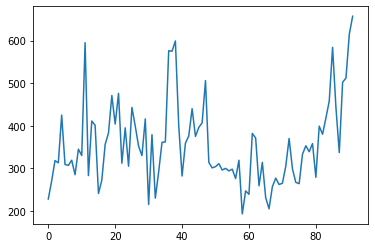

In [ ]:
data['Nowe przypadki'].plot.line()

# Estymacja punktowa

In [ ]:
n = 92
samplesNewCases = data['Nowe przypadki'].values
samplesNewCases

array([228, 270, 318, 313, 425, 309, 307, 319, 285, 345, 330, 595, 283,
       411, 401, 241, 272, 356, 383, 471, 404, 476, 312, 395, 305, 443,
       399, 352, 330, 416, 215, 379, 230, 292, 361, 362, 576, 575, 599,
       400, 282, 359, 376, 440, 375, 396, 407, 506, 314, 301, 304, 311,
       296, 300, 294, 298, 276, 319, 193, 247, 239, 382, 371, 259, 314,
       231, 205, 257, 277, 262, 265, 305, 370, 299, 267, 264, 333, 353,
       339, 358, 279, 399, 380, 418, 458, 584, 443, 337, 502, 512, 615,
       657])

In [ ]:
def myAverage(samples):
    return round(np.average(samples), 3)

In [ ]:
avg = myAverage(samplesNewCases)
avg

356.641

# Estymacja przedziałowa

In [ ]:
alfa = 0.95

In [2]:
def diffSquare(sample, avg):
    return (avg - sample) ** 2

def standardDev(samples, avg, n):
    squareDiffs = list(map(lambda s: diffSquare(s, avg), samples))
    return round(np.sqrt(np.sum(squareDiffs) / n), 3)

In [ ]:
s = standardDev(samplesNewCases, avg, n)
s

98.673

In [ ]:
ua = 1.96
sqrtN = np.sqrt(n)
factor = ua * s / sqrtN

bottom = round(avg - factor, 3)
top = round(avg + factor, 3)

print('Bottom: ', bottom)
print('Top: ', top)

Bottom:  336.478
Top:  376.804


# Weryfikacja hipotezy statystycznej

Hipoteza zerowa: Średnia ilość zgonów w maju 2022 roku była taka sama jak w czerwcu.

In [ ]:
dataMay = data[data.apply(lambda d: (dt.datetime.strptime(d.Data, "%d.%m.%Y")).month == 5, axis=1)]
dataJune = data[data.apply(lambda d: (dt.datetime.strptime(d.Data, "%d.%m.%Y")).month == 6, axis=1)]

In [ ]:
samplesMay = dataMay['Zgony'].values
samplesJune = dataJune['Zgony'].values

In [ ]:
avgMay = myAverage(samplesMay)
avgMay

13.581

In [ ]:
avgJune = myAverage(samplesJune)
avgJune

13.333

In [ ]:
t = round(np.sqrt(30) * (avgJune - avgMay) / standardDev(samplesJune, avgJune, 30), 3)
t

-0.202

In [ ]:
alfa = 0.95
n = 30
tn = 1.69726